In [72]:
#importing the required libraries
import numpy as np 
import pandas as pd

In [73]:
train_data=pd.read_csv('titanic_train.csv')

In [74]:
test_data=pd.read_csv('titanic_test.csv')

In [75]:
#checking the head of train data 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
#checking the head of test data 
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
#backward elimation method
#to chooses the right number of the observation which contribute in the output

In [78]:
#looking for the categorical features and if present converting them 
new_data=pd.get_dummies(train_data,columns=['Embarked','Sex'],drop_first=True)

In [79]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1


In [80]:
#convering the data into x and y 
X=new_data.drop(['Survived','Name','Ticket','Cabin'],axis=1)
y=train_data['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Sex_male       891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [81]:
#backward elimination
from statsmodels.formula.api import OLS

In [82]:
#importing the libraries to test for missing data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

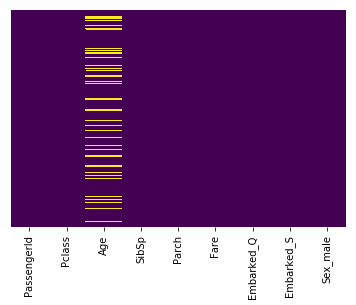

In [83]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [84]:
import seaborn as sns

In [85]:
def converter(data):
    if pd.isnull(data):
        return X['Age'].mean()
    else:
        return data

In [86]:
X['Age']=X['Age'].apply(converter)

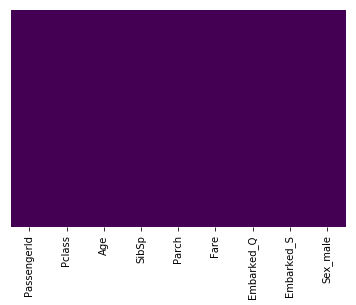

In [87]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [88]:
X_optimal=X.iloc[:,[0,1,2,3,4,5,6,7,8]]

In [89]:
model_ols=OLS(endog=y,exog= X_optimal.astype(float)).fit()

In [90]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     98.18
Date:                Sat, 10 Nov 2018   Prob (F-statistic):          1.67e-126
Time:                        20:53:45   Log-Likelihood:                -528.49
No. Observations:                 891   AIC:                             1075.
Df Residuals:                     882   BIC:                             1118.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0003   5.52e-05      4.683      

In [91]:
X_optimal=X.iloc[:,[0,1,2,3,5,6,7,8]]
model_ols=OLS(endog=y,exog= X_optimal.astype(float)).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sat, 10 Nov 2018   Prob (F-statistic):          1.59e-127
Time:                        20:53:46   Log-Likelihood:                -528.53
No. Observations:                 891   AIC:                             1073.
Df Residuals:                     883   BIC:                             1111.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0003   5.51e-05      4.679      

In [92]:
X_optimal=X.iloc[:,[0,1,2,3,5,7,8]]
model_ols=OLS(endog=y,exog= X_optimal.astype(float)).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sat, 10 Nov 2018   Prob (F-statistic):          3.88e-128
Time:                        20:53:46   Log-Likelihood:                -529.59
No. Observations:                 891   AIC:                             1073.
Df Residuals:                     884   BIC:                             1107.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0003   5.51e-05      4.697      

In [93]:
#final dataset which contains only thoese coulumn who have some impact on the final result
final_X=X.drop('Parch',axis=1)
y=train_data['Survived']

In [94]:
final_X.head()

,PassengerId,Pclass,Age,SibSp,Fare,Embarked_Q,Embarked_S,Sex_male
0,1,3,22.0,1,7.2500,0,1,1
1,2,1,38.0,1,71.2833,0,0,0
2,3,3,26.0,0,7.9250,0,1,0
3,4,1,35.0,1,53.1000,0,1,0
4,5,3,35.0,0,8.0500,0,1,1


In [95]:
#diving the data into train and test
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.33,)

In [97]:
#scaling the data 
from sklearn.preprocessing import StandardScaler

In [98]:
scaler=StandardScaler()

In [99]:
#scaling the test data 
X_test=scaler.fit_transform(X_test)

C:\Users\Vishal\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vishal\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [100]:
#scaling the train data
X_train=scaler.transform(X_train)

C:\Users\Vishal\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [101]:
#importing the keras library for impleting the Artificial Neural Network
import keras

In [102]:
#importing the libraries required for the implemention of the ANN
#Sequential - to initialise the ANN
#Dense-for creating a layer in the ANN
from keras.models import Sequential
from keras.layers import Dense

In [103]:
#initialising the ANN
model=Sequential()

In [104]:
#Adding the input layer in the ANN
model.add(Dense(units=5,kernel_initializer='uniform',activation='relu',input_dim=8))

In [105]:
#Adding the first hidden layer in the ANN
model.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

In [106]:
#Adding the Output layer in the ANN
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))


In [107]:
#Compiling the ANN using the compile function and adding the required parameters
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [108]:
#fitting the model to our data 
model.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
596/596 [==============================] - 1s 1ms/step - loss: 0.6916 - acc: 0.5923
Epoch 2/100
596/596 [==============================] - 0s 194us/step - loss: 0.6816 - acc: 0.6091
Epoch 3/100
596/596 [==============================] - 0s 221us/step - loss: 0.6531 - acc: 0.7114
Epoch 4/100
596/596 [==============================] - 0s 194us/step - loss: 0.6054 - acc: 0.7785
Epoch 5/100
596/596 [==============================] - 0s 205us/step - loss: 0.5580 - acc: 0.7718
Epoch 6/100
596/596 [==============================] - 0s 221us/step - loss: 0.5266 - acc: 0.7735
Epoch 7/100
596/596 [==============================] - 0s 221us/step - loss: 0.5090 - acc: 0.7735
Epoch 8/100
596/596 [==============================] - 0s 194us/step - loss: 0.4979 - acc: 0.7752
Epoch 9/100
596/596 [==============================] - 0s 168us/step - loss: 0.4906 - acc: 0.7718
Epoch 10/100
596/596 [==============================] - 0s 205us/step - loss: 0.4849 - acc: 0.7735
Epoch 11/100
596/596 

596/596 [==============================] - 0s 142us/step - loss: 0.4395 - acc: 0.8070
Epoch 84/100
596/596 [==============================] - 0s 116us/step - loss: 0.4387 - acc: 0.8070
Epoch 85/100
596/596 [==============================] - 0s 105us/step - loss: 0.4388 - acc: 0.8054
Epoch 86/100
596/596 [==============================] - 0s 116us/step - loss: 0.4388 - acc: 0.8003
Epoch 87/100
596/596 [==============================] - 0s 116us/step - loss: 0.4389 - acc: 0.8020
Epoch 88/100
596/596 [==============================] - 0s 79us/step - loss: 0.4387 - acc: 0.8054
Epoch 89/100
596/596 [==============================] - 0s 116us/step - loss: 0.4385 - acc: 0.8037
Epoch 90/100
596/596 [==============================] - 0s 105us/step - loss: 0.4379 - acc: 0.8121
Epoch 91/100
596/596 [==============================] - 0s 90us/step - loss: 0.4381 - acc: 0.8037
Epoch 92/100
596/596 [==============================] - 0s 105us/step - loss: 0.4379 - acc: 0.8070
Epoch 93/100
596/596 [===

In [113]:
#making predictions from the model
predict=model.predict(X_test)

In [110]:
    
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
predict=(predict>0.5)
print(confusion_matrix(y_test,predict))

[[176  16]
 [ 24  79]]


In [112]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       192
           1       0.83      0.77      0.80       103

   micro avg       0.86      0.86      0.86       295
   macro avg       0.86      0.84      0.85       295
weighted avg       0.86      0.86      0.86       295



#The accuracy of the ann model can be further increased by parameter tunning or by adding more hidden layer in our ANN model